# Final Project - Linkedin

## Introduction to Data Analytics 2024
### Presented by orel ben naim

#### Data source: https://www.kaggle.com/killbot/linkedin-profiles-and-jobs-data


<img src="https://i.pinimg.com/originals/d3/3b/d9/d33bd9baa83a336184055c07dc8ccaa8.gif" width=700 height=700 align=left />

## I have chosen to analyze LinkedIn, an online social network designed to foster professional and business connections among its users. LinkedIn was established in 2003 and has since become a key tool for professionals in various fields. The platform allows users to create professional profiles, share resumes, showcase skills and achievements, and connect with colleagues, recruiters, and potential employers.

## In this project, I examined network data to identify the factors that contribute to effective use of the platform. LinkedIn helps millions of users worldwide by providing them with tools to build professional networks, find job opportunities, and share knowledge and insights in their fields. As a student and future engineer, it is particularly important for me to learn how to utilize LinkedIn optimally to find employment opportunities and build my career in the coming years.

<img src="https://admin.drushim.co.il/Content/Uploads/636670041546219798_84.1.jpg" width=700 height=700 align=center />

# Wrangling data:

## 1. Handling missing values:

In [60]:
import pandas as pd 
import numpy as np 
import datetime  
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns


In [61]:
url = ("https://www.kaggle.com/datasets/killbot/linkedin-profiles-and-jobs-data")
data = r"C:\Users\Orel1\Desktop\שנה א -אוראל\סמסטר ב\מבוא לניתוח נתונים\מבוא לניתוח נתונים\מבוא לניתוח נתונים\פרוייקט גמר\Linkedin CSV.csv"

In [62]:
df = pd.read_csv(data)

In [63]:
df = df.dropna(subset=['genderEstimate']) 
df['hasPicture'].fillna('no picture', inplace=True) 
df['companyHasLogo'].fillna('no logo', inplace=True)
df = df.dropna(subset=['companyName'])

#### 1) I removed rows with missing data from the "companyName" and "genderEstimate" columns.
#### 2) For missing values under "hasPicture" and "companyHasLogo," I filled in "no picture / logo.".

In [64]:
missing = df[['genderEstimate', 'hasPicture', 'companyHasLogo', 'companyName']].isnull().sum()
pd.DataFrame(missing) 

,0
genderEstimate,0
hasPicture,0
companyHasLogo,0
companyName,0


In [65]:
df.head()

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,...,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
0,0,41,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500,au,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345,01/07/2014,760.5000,989.9361
1,1,41,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500,au,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346,01/11/2013,760.5000,989.9361
2,2,41,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500,au,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348,01/08/2008,760.5000,747.2308
3,3,41,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500,au,...,"urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350,01/02/2007,760.5000,989.9361
4,4,30,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500,au,...,"urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893,01/01/2017,395.2857,683.3496


## 2. Fix columns:

In [66]:
df[['genderEstimate','hasPicture','companyHasLogo','companyName','followersCount','ageEstimate']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 35565 entries, 0 to 39536
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   genderEstimate  35565 non-null  object
 1   hasPicture      35565 non-null  object
 2   companyHasLogo  35565 non-null  object
 3   companyName     35565 non-null  object
 4   followersCount  35565 non-null  int64 
 5   ageEstimate     35565 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35565 entries, 0 to 39536
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             35565 non-null  int64  
 1   ageEstimate            35565 non-null  int64  
 2   companyFollowerCount   34268 non-null  float64
 3   companyHasLogo         35565 non-null  object 
 4   companyName            35565 non-null  object 
 5   companyStaffCount      34557 non-null  float64
 6   companyUrl             33695 non-null  object 
 7   companyUrn             35565 non-null  object 
 8   connectionsCount       35565 non-null  int64  
 9   country                35565 non-null  object 
 10  endDate                27575 non-null  object 
 11  followable             35565 non-null  int64  
 12  followersCount         35565 non-null  int64  
 13  genderEstimate         35565 non-null  object 
 14  hasPicture             35565 non-null  object 
 15  isPremi

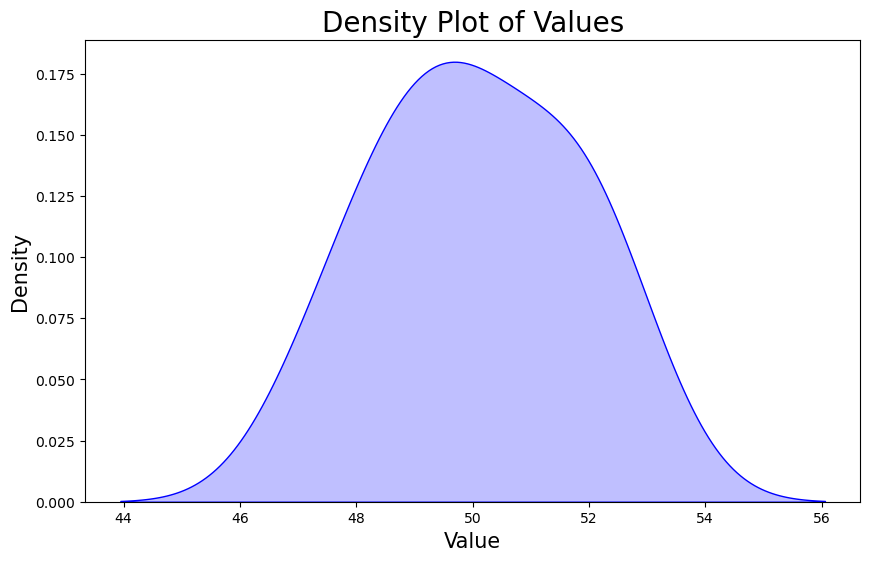

In [68]:
data = pd.DataFrame({
    'value': [50, 52, 49, 48, 53, 47, 51, 52, 49, 50, 50, 49, 52, 48, 51]
    # Add other columns as needed
})

# Ensure that the column 'value' exists in the DataFrame
if 'value' not in data.columns:
    raise ValueError("'value' column not found in data")

# Plot the KDE (Kernel Density Estimate) for the 'value' column
plt.figure(figsize=(10, 6))
sns.kdeplot(data['value'], color='blue', fill=True)
plt.title('Density Plot of Values', fontsize=20)
plt.xlabel('Value', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [69]:

#plt.figure(figsize=(15, 6))

## subplot 
#plt.subplot(1, 2, 1)
#plt.title("Male/Female percentage", fontsize=25)
#plotpie = df['genderEstimate'].value_counts().plot.pie(autopct='%1.1f%%', colors=['mediumaquamarine', 'plum'])
#plt.legend(fontsize=15)  # להוסיף אגרף המרקבת

## subplot 
#plt.subplot(1, 2, 2)
#plt.title("Male/Female count", fontsize=25)
#plt.xlabel("Gender Estimate", fontsize=20)
#plt.ylabel("count", fontsize=20)
#sns.countplot(x="genderEstimate", data=df, edgecolor='black', palette='PiYG_r', hue='genderEstimate')

#plt.show()


In [70]:
data = pd.read_csv('r"C:\Users\Orel1\Desktop\שנה א -אוראל\סמסטר ב\מבוא לניתוח נתונים\מבוא לניתוח נתונים\מבוא לניתוח נתונים\פרוייקט גמר\Linkedin CSV.csv"')
if 'genderEstimate' in data.columns:
    data['genderEstimate'] = data['genderEstimate'].astype(str)

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data['genderEstimate'], color='blue', fill=True)
    plt.title('Density Plot of genderEstimate', fontsize=20)
    plt.xlabel('genderEstimate', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.show()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 4-5: truncated \UXXXXXXXX escape (2159846214.py, line 1)

In [57]:
data['genderEstimate'] = data['genderEstimate'].astype(str)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Male/Female Percentage", fontsize=25)
plotpie = data['genderEstimate'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['mediumaquamarine', 'plum'],
    fontsize=15
)
plt.legend(fontsize=15)
plt.subplot(1, 2, 2)
plt.show()


KeyError: 'genderEstimate'

TypeError: string indices must be integers, not 'str'

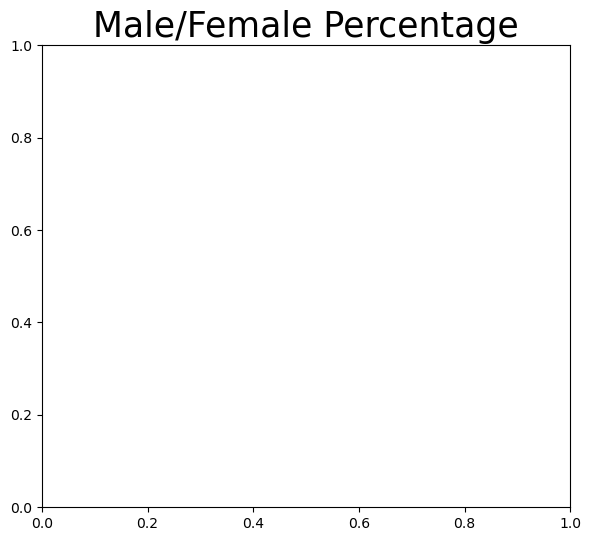

In [36]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title("Male/Female Percentage",fontsize=25)
plotpie=data['genderEstimate'].value_counts().plot.pie(autopct='%1.1f%%',colors = ['mediumaquamarine', 'plum'],fontsize=15)
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.title("Male/Female Count",fontsize=25)
plt.xlabel("Gender Estimate",fontsize=20)
plt.ylabel("Count",fontsize=20)
sns.countplot( x="genderEstimate",data=data , edgecolor = 'black', palette = 'PiYG_r', hue='genderEstimate')
plt.show()

C:\Users\Orel1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Orel1\AppData\Local\Temp\ipykernel_11996\3063898834.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2000x600 with 0 Axes>

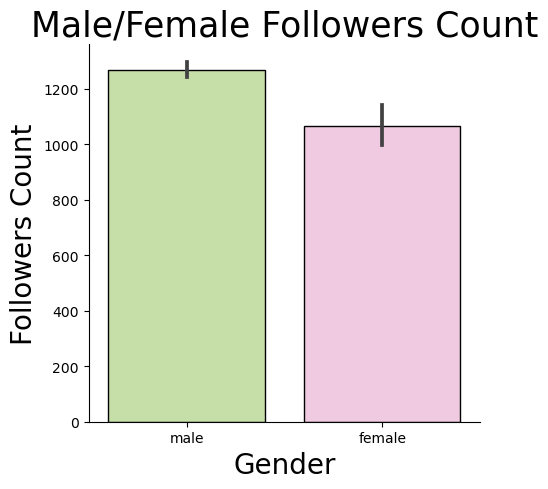

In [42]:
plt.figure(figsize=(20, 6)) 
type_df = df[["genderEstimate", "followersCount"]] 
sns.catplot(data=type_df, kind="bar", x="genderEstimate", y = "followersCount",height=5,aspect=1,edgecolor = 'black',palette = 'PiYG_r')
plt.title("Male/Female Followers Count",fontsize=25) 
plt.xlabel("Gender",fontsize=20) 
plt.ylabel("Followers Count",fontsize=20)
plt.tight_layout()
plt.show()

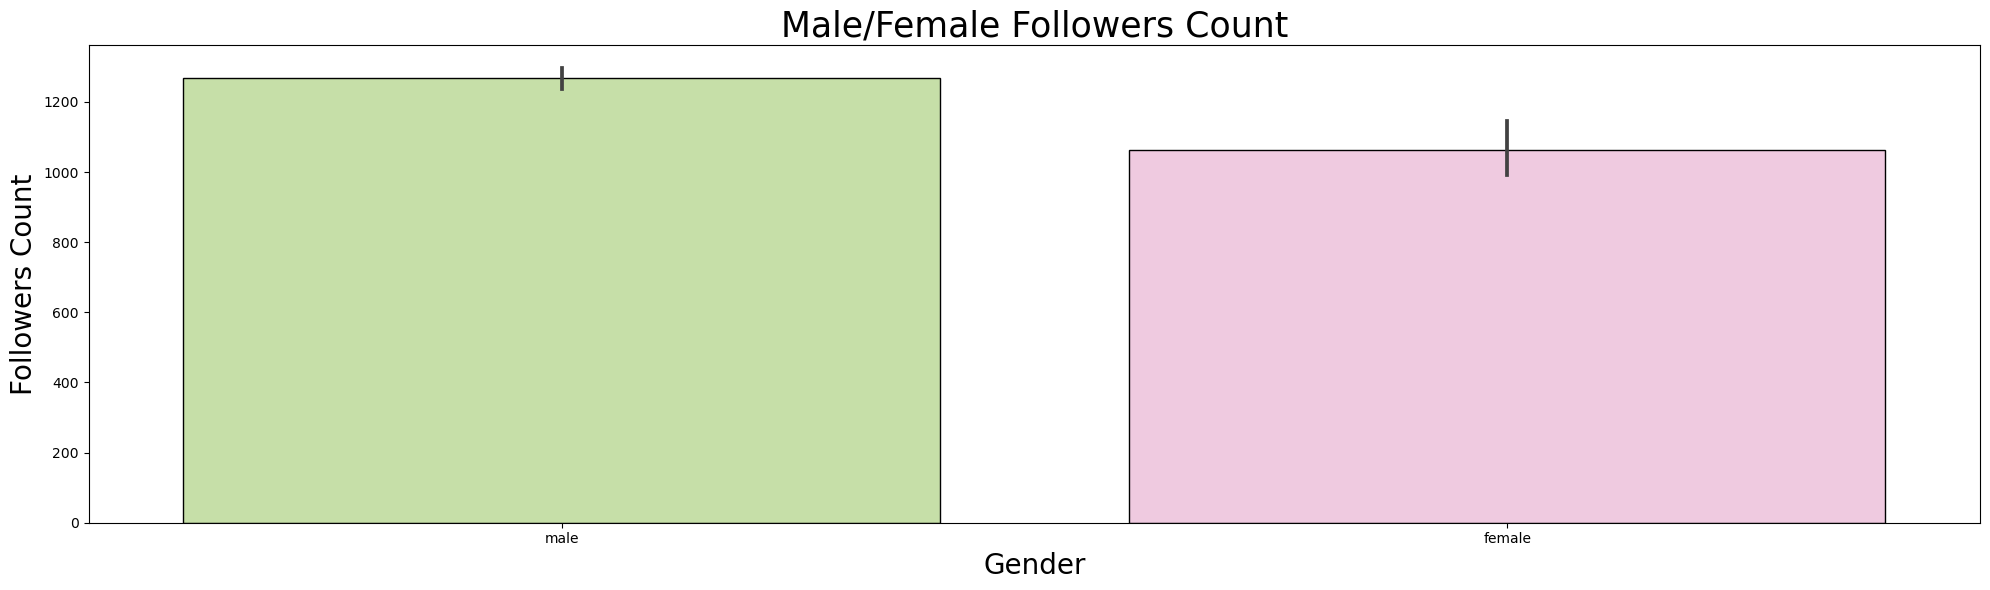

In [43]:

data = pd.read_csv(r'C:\Users\Orel1\Desktop\שנה א -אוראל\סמסטר ב\מבוא לניתוח נתונים\מבוא לניתוח נתונים\מבוא לניתוח נתונים\פרוייקט גמר\Linkedin CSV.csv')

# יצירת גרף באמצעות seaborn
plt.figure(figsize=(20, 6))
sns.barplot(data=data, x="genderEstimate", y="followersCount", edgecolor='black', palette='PiYG_r')
plt.title("Male/Female Followers Count", fontsize=25)
plt.xlabel("Gender", fontsize=20)
plt.ylabel("Followers Count", fontsize=20)

# הוספת פונקציה להכנת הגרפים
plt.tight_layout()

# הצגת הגרף
plt.show()

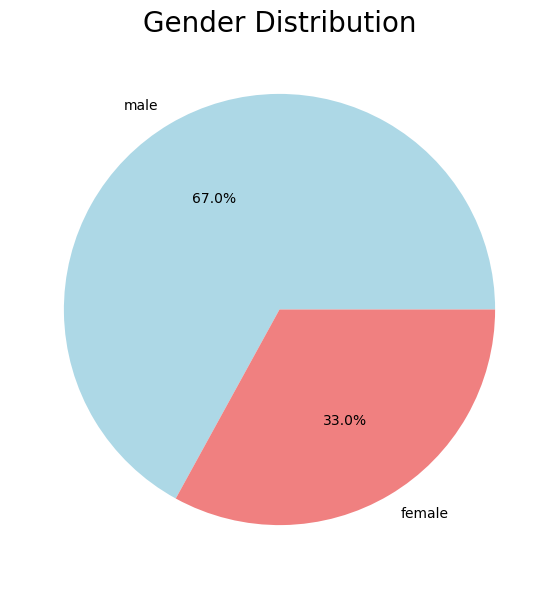

In [44]:
# טעינת הנתונים מהקובץ CSV
data = pd.read_csv(r'C:\Users\Orel1\Desktop\שנה א -אוראל\סמסטר ב\מבוא לניתוח נתונים\מבוא לניתוח נתונים\מבוא לניתוח נתונים\פרוייקט גמר\Linkedin CSV.csv')

# יצירת גרף פאי עבור האחוזים של כל קבוצת מין
plt.figure(figsize=(10, 7))
plt.title("Gender Distribution", fontsize=20)
data['genderEstimate'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], labels=data['genderEstimate'].unique())
plt.ylabel('')  # להסיר את התווית עבור ציר ה-Y
plt.show()


In [45]:
plt.figure(figsize=(10, 5))
data.loc[data['hasPicture'].str.contains('jpg'), 'hasPicture'] = 'has picture'
data.loc[data['hasPicture'].str.contains('A'), 'hasPicture'] = 'has picture'
data.loc[data['companyHasLogo'].str.contains('png'), 'companyHasLogo'] = 'has logo'
data.loc[data['companyHasLogo'].str.contains('jpg'), 'companyHasLogo'] = 'has logo'
data.loc[data['companyHasLogo'].str.contains('e'), 'companyHasLogo'] = 'has logo'
data.loc[data['companyHasLogo'].str.contains('A'), 'companyHasLogo'] = 'has logo'

ValueError: Cannot mask with non-boolean array containing NA / NaN values

<Figure size 1000x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 2.4))
data.groupby(['companyHasLogo','hasPicture'])['followersCount'].count().plot.bar(edgecolor = 'black',color=['mediumvioletred','deeppink', 'hotpink', 'pink'])
plt.xticks(rotation=60,fontsize=12)
plt.title("Logo/Picture effect on Followers Count",fontsize=22)
plt.xlabel("Logo vs Picture",fontsize=15)
plt.ylabel("Followers Count",fontsize=15)

Text(0, 0.5, 'Followers Count')

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.title("Logo Percentage",fontsize=30)
plotpie=data['companyHasLogo'].value_counts().plot.pie(autopct='%1.2f%%',colors = ['orchid', 'lightpink'],fontsize=15)
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.title("Pictures Percentage",fontsize=30)
plotpie=data['hasPicture'].value_counts().plot.pie(autopct='%1.2f%%',colors = ['orchid', 'lightpink'],fontsize=15)
plt.legend(fontsize=15)
plt.show()